# Seminar 4

On this seminar, we will on Wi-Fi performance, specifically, how to address this topic using NNs


### Part 1 Data Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df_test = pd.read_csv("test_data.csv")
df_train = pd.read_csv("train_data.csv")

# Show descriptive statistics
display(df_train.describe())

# Plot histograms for each feature
df_train.hist(bins=30, figsize=(15, 10), grid=True)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Select main features and performance metrics
features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
performance = ["TxThroughput", "AvgPingLatency"]

# Compute correlation matrix between features and performance metrics
corr = df_train[features + performance].corr()

# Extract only correlations of features with performance metrics
corr_focus = corr.loc[features, performance]

# Plot the focused correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_focus, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Features vs. Performance Metrics")
plt.xlabel("Performance Metric")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
display(df_train.shape)

display(df_test.shape)

(33600, 7)

(8400, 7)

In [ ]:
display(df_train.head())

,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
0,2,-72.32,163.11,118.36,1,13.51,51.79
1,32,-73.18,238.45,212.83,1,3.35,68.80
2,20,-40.67,865.44,863.39,1,17.62,50.79
3,10,-60.66,473.89,396.92,1,14.30,64.15
4,29,-67.96,479.74,355.99,1,4.81,73.81


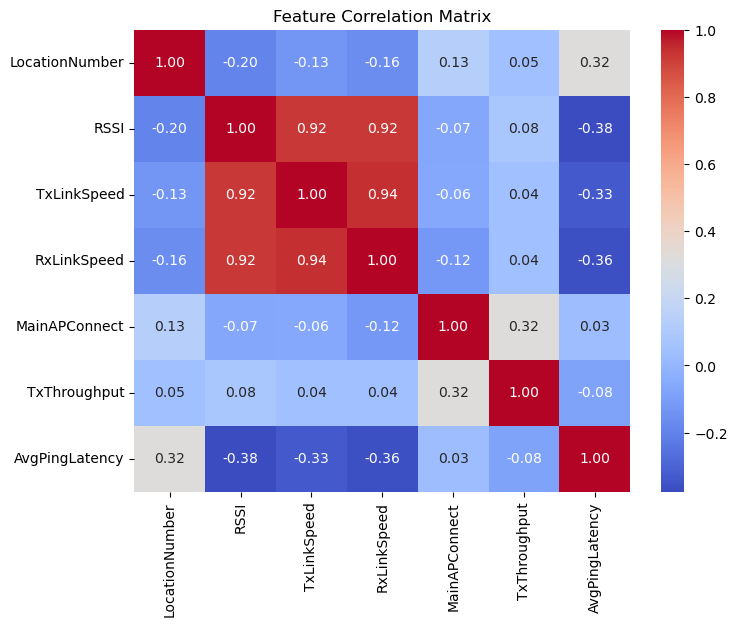

In [ ]:
# Optional: Plot the correlation matrix for all features
# This can be useful for understanding relationships between all features

plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

### Part 2 FNNs

Looking at the correlation Matrix, we can see that RSSI, TxLinkSpeed and RxLinkSpeed, have a strong negative correlation with the Average Ping Latency, while they have small correlation with TxThorughput.

We can also see that MainAPConnect has a strong positive correlation with TxThroughput , and a small correlation with Average Ping Latency, completely contrary as the other two.

Since we have only 4 input features for predicting 2 outuput features, and the 4 of them present somewhat of a correlation with the 2 expected features (in some way or anothre), it makes sense to keep the 4 and work with everything.

The design of the FNN, will have 4 inputs, the hidden layers that we will discuss later on and finally the 2 output features that measure the quality of the Wi-Fi.

In [ ]:
# Feature selection for modeling

features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
targets = ["TxThroughput", "AvgPingLatency"]

X_train = df_train[features]
y_train = df_train[targets]

X_test = df_test[features]
y_test = df_test[targets]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the features (recommended for neural networks)
scaler = StandardScaler()
X_scaled_trian = scaler.fit_transform(X_train)

# If you need to encode categorical variables, use OneHotEncoder or similar.
# In your case, 'MainAPConnect' is already 0/1, so no encoding is needed.

# Optionally, you can also scale the targets if you want (especially for regression)
from sklearn.preprocessing import MinMaxScaler
y_scaler_train = MinMaxScaler()
y_scaled_train = y_scaler_train.fit_transform(y_train)

# X_scaled is now ready for training your FNN

Now we have prepared the data for developing, what we shall do is to prepare a model for learning the non-linear relationships there is on it.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Normalize the test set using the same scaler as the train set
X_test_scaled = scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

# Build a simple FNN model
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),   # 4 input features
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(y_scaled.shape[1])             # 2 outputs
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print("Test loss:", test_loss)
print("Test MAE:", test_mae)

ModuleNotFoundError: No module named 'tensorflow'